In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.compose import make_column_transformer

In [ ]:
from google.colab import files
upload = files.upload()

Saving student-mat.csv to student-mat (1).csv


In [ ]:
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [ ]:
data = pd.read_csv('student-mat.csv', header=0)

# Предварительный анализ данных

# Модели и предсказания

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [ ]:
data.shape

(395, 33)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

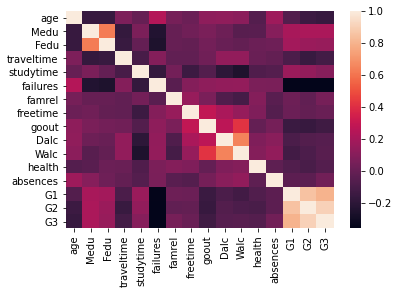

In [ ]:
corr = data.corr()
seaborn.heatmap(corr)

In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Подготовка данных

In [ ]:
X = data.loc[:, :'G1']
y = data.loc[:,'G3']
data_without_G = data.loc[:, :'G1']

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "Medu", "Fedu", 'traveltime', 'studytime', 
                      'failures', 'famrel', 'freetime', 'goout', 'Dalc', 
                      'Walc', 'health', 'absences', 'G1']),  # преобразуем числа от 0 до 1 

    (OneHotEncoder(handle_unknown="ignore"), ["sex", "school", "address", 'famsize', 
                                              'Pstatus', 'Mjob', 'Fjob', 'reason', 
                                              'guardian', 'schoolsup', 'famsup',
                                              'paid', 'activities', 'nursery',
                                              'higher', 'internet', 'romantic'])
)

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.15)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.15)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.15)
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.15)
X5_train, X5_test, y5_train, y5_test = train_test_split(X, y, test_size=0.15)

ct.fit(X1_train)

X1_train_normal = ct.transform(X1_train)
X1_test_normal = ct.transform(X1_test)

X2_train_normal = ct.transform(X2_train)
X2_test_normal = ct.transform(X2_test)

X3_train_normal = ct.transform(X3_train)
X3_test_normal = ct.transform(X3_test)

X4_train_normal = ct.transform(X4_train)
X4_test_normal = ct.transform(X4_test)

X5_train_normal = ct.transform(X5_train)
X5_test_normal = ct.transform(X5_test)

data_one_hot = pd.get_dummies(data_without_G)
data_one_hot.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


In [ ]:
X1_test_normal[0]

array([0.16666667, 0.5       , 0.25      , 0.        , 0.33333333,
       0.        , 0.75      , 0.5       , 1.        , 0.        ,
       0.        , 1.        , 0.02666667, 0.3125    , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        ])

In [ ]:
X1_train_normal[0]

array([0.        , 0.5       , 0.5       , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.25      , 0.        ,
       0.        , 0.5       , 0.10666667, 0.25      , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        ])

In [ ]:
X2_train_normal[0]

array([0.5       , 1.        , 0.5       , 0.        , 0.33333333,
       0.        , 0.75      , 0.5       , 0.25      , 0.        ,
       0.75      , 1.        , 0.14666667, 0.5625    , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        ])

In [ ]:
cross_val_X_train = [X1_train_normal, X2_train_normal, X3_train_normal, X4_train_normal, X5_train_normal]
cross_val_X_test = [X1_test_normal, X2_test_normal, X3_test_normal, X4_test_normal, X5_test_normal]

cross_val_y_train = [y1_train, y2_train, y3_train, y4_train, y5_train]
cross_val_y_test = [y1_test, y2_test, y3_test, y4_test, y5_test]

## Моделирование и оценка качества

In [ ]:
error_1 = []
tf.random.set_seed(64)

model_1G = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(20, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='relu'),
])

model_1G.compile(loss=tf.keras.losses.mse,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['mse'])

for ind in range(5):
    X_train_normal, y_train = cross_val_X_train[ind], cross_val_y_train[ind]
    X_test_normal, y_test = cross_val_X_test[ind], cross_val_y_test[ind]
    history_1G = model_1G.fit(X_train_normal, y_train, epochs=600)

    y_preds = model_1G.predict(X_test_normal)

    mae_1G = mae(y_test, y_preds)
    mse_1G = mse(y_test, y_preds)
    error_1.append([mae_1G.numpy(), mse_1G.numpy()])


Выходные данные были обрезаны до нескольких последних строк (5000).
Epoch 501/600
11/11 [==============================] - 0s 3ms/step - loss: 0.1595 - mse: 0.1595
Epoch 502/600
11/11 [==============================] - 0s 2ms/step - loss: 0.2202 - mse: 0.2202
Epoch 503/600
11/11 [==============================] - 0s 2ms/step - loss: 0.1774 - mse: 0.1774
Epoch 504/600
11/11 [==============================] - 0s 2ms/step - loss: 0.1855 - mse: 0.1855
Epoch 505/600
11/11 [==============================] - 0s 2ms/step - loss: 0.1523 - mse: 0.1523
Epoch 506/600
11/11 [==============================] - 0s 3ms/step - loss: 0.1449 - mse: 0.1449
Epoch 507/600
11/11 [==============================] - 0s 2ms/step - loss: 0.1665 - mse: 0.1665
Epoch 508/600
11/11 [==============================] - 0s 2ms/step - loss: 0.1774 - mse: 0.1774
Epoch 509/600
11/11 [==============================] - 0s 2ms/step - loss: 0.2005 - mse: 0.2005
Epoch 510/600
11/11 [==============================] - 0s 2ms/step -

In [ ]:
error_1  # mae, mse

[[2.537485, 11.483706],
 [0.78681254, 1.2868396],
 [0.52339375, 0.76232785],
 [0.24960133, 0.11060831],
 [0.25201875, 0.18872577]]

In [ ]:
error_2 = []
tf.random.set_seed(64)

model_2G = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(20, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='relu')
])

model_2G.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics=['mae'])

for ind in range(5):
    X_train_normal, y_train = cross_val_X_train[ind], cross_val_y_train[ind]
    X_test_normal, y_test = cross_val_X_test[ind], cross_val_y_test[ind]

    history_2G = model_2G.fit(X_train_normal, y_train, epochs=600)

    y_preds = model_2G.predict(X_test_normal)

    mae_1G = mae(y_test, y_preds)
    mse_1G = mse(y_test, y_preds)
    error_2.append([mae_1G.numpy(), mse_1G.numpy()])

Выходные данные были обрезаны до нескольких последних строк (5000).
Epoch 501/600
11/11 [==============================] - 0s 2ms/step - loss: 0.2794 - mae: 0.2794
Epoch 502/600
11/11 [==============================] - 0s 2ms/step - loss: 0.2771 - mae: 0.2771
Epoch 503/600
11/11 [==============================] - 0s 2ms/step - loss: 0.2586 - mae: 0.2586
Epoch 504/600
11/11 [==============================] - 0s 2ms/step - loss: 0.2619 - mae: 0.2619
Epoch 505/600
11/11 [==============================] - 0s 2ms/step - loss: 0.2650 - mae: 0.2650
Epoch 506/600
11/11 [==============================] - 0s 2ms/step - loss: 0.2780 - mae: 0.2780
Epoch 507/600
11/11 [==============================] - 0s 3ms/step - loss: 0.2837 - mae: 0.2837
Epoch 508/600
11/11 [==============================] - 0s 3ms/step - loss: 0.3301 - mae: 0.3301
Epoch 509/600
11/11 [==============================] - 0s 2ms/step - loss: 0.3045 - mae: 0.3045
Epoch 510/600
11/11 [==============================] - 0s 2ms/step -

In [ ]:
error_2

[[2.490066, 11.411347],
 [1.0074838, 2.0851367],
 [0.8076075, 2.179344],
 [0.35343805, 0.44069514],
 [0.32139218, 0.46449947]]

In [ ]:
error_3 = []
tf.random.set_seed(64)

model_3G = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(20, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='relu'),
])

model_3G.compile(loss = tf.keras.losses.mse,
             optimizer = tf.keras.optimizers.Adam(),
             metrics=['mse'])

for ind in range(5):
    X_train_normal, y_train = cross_val_X_train[ind], cross_val_y_train[ind]
    X_test_normal, y_test = cross_val_X_test[ind], cross_val_y_test[ind]

    history_3G = model_3G.fit(X_train_normal, y_train, epochs=500)

    y_preds = model_3G.predict(X_test_normal)

    mae_1G = mae(y_test, y_preds)
    mse_1G = mse(y_test, y_preds)
    error_3.append([mae_1G.numpy(), mse_1G.numpy()])

Выходные данные были обрезаны до нескольких последних строк (5000).
Epoch 1/500
11/11 [==============================] - 0s 3ms/step - loss: 121.9054 - mse: 121.9054
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 99.9143 - mse: 99.9143
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 82.4411 - mse: 82.4411
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 78.5293 - mse: 78.5293
Epoch 5/500
11/11 [==============================] - 0s 1ms/step - loss: 67.3861 - mse: 67.3861
Epoch 6/500
11/11 [==============================] - 0s 1ms/step - loss: 65.1461 - mse: 65.1461
Epoch 7/500
11/11 [==============================] - 0s 1ms/step - loss: 62.7429 - mse: 62.7429
Epoch 8/500
11/11 [==============================] - 0s 2ms/step - loss: 67.3225 - mse: 67.3225
Epoch 9/500
11/11 [==============================] - 0s 2ms/step - loss: 58.2190 - mse: 58.2190
Epoch 10/500
11/11 [==============================] - 0s 2ms/step 

In [ ]:
error_3

[[2.514366, 11.0661955],
 [0.9215592, 1.4599776],
 [0.514115, 0.66604084],
 [0.280894, 0.14413589],
 [0.27350584, 0.19865736]]

In [ ]:
error_4 = []
tf.random.set_seed(64)

model_4G = tf.keras.Sequential([
    tf.keras.layers.Dense(150),
    tf.keras.layers.Dense(75),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_4G.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics=['mae'])

for ind in range(5):
    X_train_normal, y_train = cross_val_X_train[ind], cross_val_y_train[ind]
    X_test_normal, y_test = cross_val_X_test[ind], cross_val_y_test[ind]

    history_4G = model_4G.fit(X_train_normal, y_train, epochs=300)

    y_preds = model_4G.predict(X_test_normal)

    mae_1G = mae(y_test, y_preds)
    mse_1G = mse(y_test, y_preds)
    error_4.append([mae_1G.numpy(), mse_1G.numpy()])

Epoch 1/300
11/11 [==============================] - 0s 2ms/step - loss: 8.5798 - mae: 8.5798
Epoch 2/300
11/11 [==============================] - 0s 2ms/step - loss: 4.0969 - mae: 4.0969
Epoch 3/300
11/11 [==============================] - 0s 3ms/step - loss: 3.3982 - mae: 3.3982
Epoch 4/300
11/11 [==============================] - 0s 2ms/step - loss: 3.2973 - mae: 3.2973
Epoch 5/300
11/11 [==============================] - 0s 2ms/step - loss: 2.8212 - mae: 2.8212
Epoch 6/300
11/11 [==============================] - 0s 2ms/step - loss: 2.8391 - mae: 2.8391
Epoch 7/300
11/11 [==============================] - 0s 2ms/step - loss: 2.7667 - mae: 2.7667
Epoch 8/300
11/11 [==============================] - 0s 2ms/step - loss: 2.4809 - mae: 2.4809
Epoch 9/300
11/11 [==============================] - 0s 2ms/step - loss: 2.5438 - mae: 2.5438
Epoch 10/300
11/11 [==============================] - 0s 2ms/step - loss: 2.3482 - mae: 2.3482
Epoch 11/300
11/11 [==============================] - 0s 2m

In [ ]:
error_4

[[1.8858845, 7.879344],
 [1.8436414, 6.680451],
 [2.0449164, 8.912004],
 [1.7307061, 6.5603876],
 [1.714148, 6.2852573]]

In [ ]:
errors_1 = [sum(x[0] for x in error_1) / 5, sum(x[1] for x in error_1) / 5]
errors_2 = [sum(x[0] for x in error_2) / 5, sum(x[1] for x in error_2) / 5]
errors_3 = [sum(x[0] for x in error_3) / 5, sum(x[1] for x in error_3) / 5]
errors_4 = [sum(x[0] for x in error_4) / 5, sum(x[1] for x in error_4) / 5]

model_results = [["model_1G", errors_1[0], errors_1[1]],
                 ["model_2G", errors_2[0], errors_2[1]],
                 ["model_3G", errors_3[0], errors_3[1]],
                 ["model_4G", errors_4[0], errors_4[1]]]
all_results = pd.DataFrame(model_results, columns=["model", "mean mae", "mean mse"])
all_results

,model,mean mae,mean mse
0,model_1G,0.869862,2.766442
1,model_2G,0.995998,3.316205
2,model_3G,0.900888,2.707001
3,model_4G,1.843859,7.263489


## Предсказание по двум лучшим моделям

In [ ]:
y_preds_2G = model_2G.predict(X5_test_normal)
y_preds_3G = model_3G.predict(X5_test_normal)

y_preds_2G, y_preds_3G = map(float, y_preds_2G), map(float, y_preds_3G)

res = pd.DataFrame(zip(y_preds_2G, y_preds_3G, y5_test), 
                   columns=['y_preds_2G', 'y_preds_3G', 'y_test'])
res

,y_preds_2G,y_preds_3G,y_test
0,11.012753,10.931468,11
1,12.419649,12.407269,12
2,13.304293,13.208550,13
3,6.177563,6.369810,6
4,6.583177,6.442570,6
5,10.907793,10.740492,11
6,11.374495,11.066633,11
7,5.951443,6.251947,6
8,4.449853,2.461979,0
9,9.324817,9.265828,9
